# Project Title : Mall Customers Segmentation

## Business Objective 

>To create Customer cluster to identify the different types of customers

### Required Libraries

In [248]:
#for data analysis
import pandas as pd
import numpy as np

#for data visulalization
import matplotlib.pyplot as plt
import seaborn as sns

#for clustering algorithm
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

#feature scaling
from sklearn.preprocessing import StandardScaler

#silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


#load encoder
from sklearn import preprocessing


#to avoid warning
import warnings
warnings.simplefilter("ignore")

### Import Data

In [276]:
#read data
cust_df = pd.read_csv("Proj3_MallCustomers_Data_Project.csv")


In [277]:
#preview the data
cust_df_c = cust_df
cust_df_c.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Preproceesing

In [278]:
#drop the CustomerID feature as it a unique id
cust_df_c.drop(['CustomerID'], axis = 1, inplace = True)

In [6]:
cust_df_c.head(2)   #customerID is dropped 

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


In [8]:
#Datatypes
print(cust_df_c.dtypes)

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [9]:
#Number of rows and columns
print(cust_df_c.shape) 

(200, 4)


In [10]:
#Names of all the columns
print(cust_df_c.columns) 

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [11]:
cust_df_c.info()       # returns the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [12]:
#Checking if there are null values in any columns
cust_df_c.isnull().sum()       # isnull returns the True/False dataframe
                            #sum: counts the number of True in columns

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no missing value exists in this dataset

### EDA

#### Analysis of each feature

In [20]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {cust_df_c[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is : {cust_df_c[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {cust_df_c[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    


In [21]:
info_of_cat('Gender')

Unique values in Gender are: ['Male' 'Female']
Mode of Gender is : Female
Number of missing values in Gender is 0


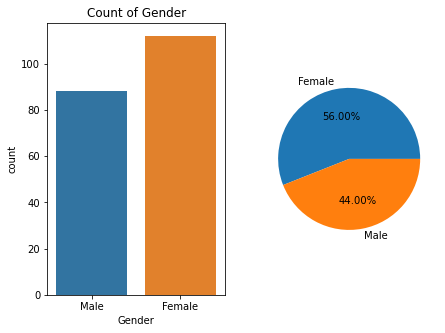

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (7, 5))
ax[0].set_title("Count of Gender")                  # the title of the graph
percentage = cust_df_c["Gender"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(cust_df_c["Gender"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = cust_df_c["Gender"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

##### Interpretation: 
> The results show that the female customers are mostly visited the mall as compare to male customers.

In [28]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {cust_df_c[col].mean()}")
    print(f"The median of the {col} is {cust_df_c[col].median()}")
    print(f"The mode of the {col} is {cust_df_c[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {cust_df_c[col].std()}")
    print(f"Number of missing values in the {col} is {cust_df_c[col].isnull().sum()}")

In [29]:
info_of_numerical('Age')

The mean of the Age is 38.85
The median of the Age is 36.0
The mode of the Age is 32
The standard deviation of the Age is 13.969007331558883
Number of missing values in the Age is 0


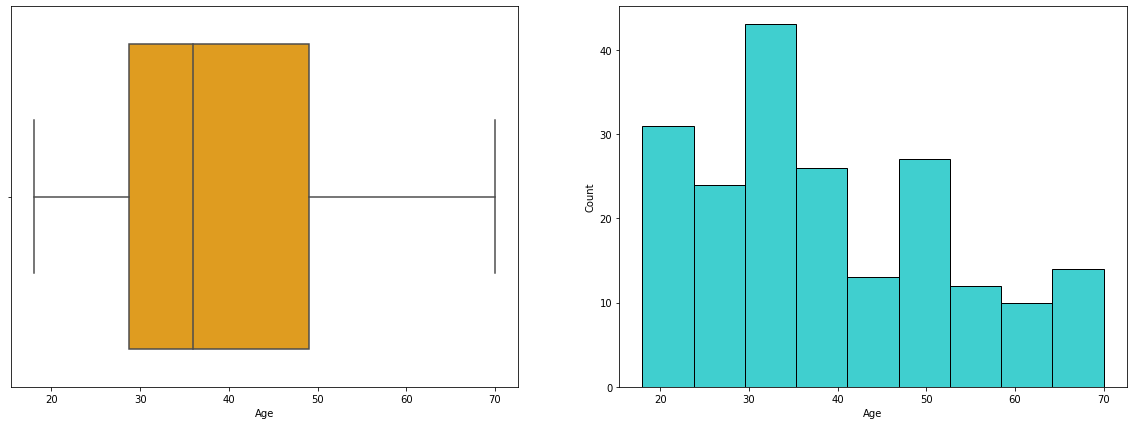

In [34]:
# Distribution of Customer_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = cust_df_c["Age"], ax =ax[1], color = "c") # ax[1] means image will plot at the second space
sns.boxplot(x = cust_df_c["Age"], ax = ax[0], color = "orange") # ax[0] means image will plot at the second space
plt.show()

There is no outliers present in the data and it little right skewed as mean is greater than the median.

In [35]:
info_of_numerical('Annual Income (k$)')

The mean of the Annual Income (k$) is 60.56
The median of the Annual Income (k$) is 61.5
The mode of the Annual Income (k$) is 54
The standard deviation of the Annual Income (k$) is 26.264721165271254
Number of missing values in the Annual Income (k$) is 0


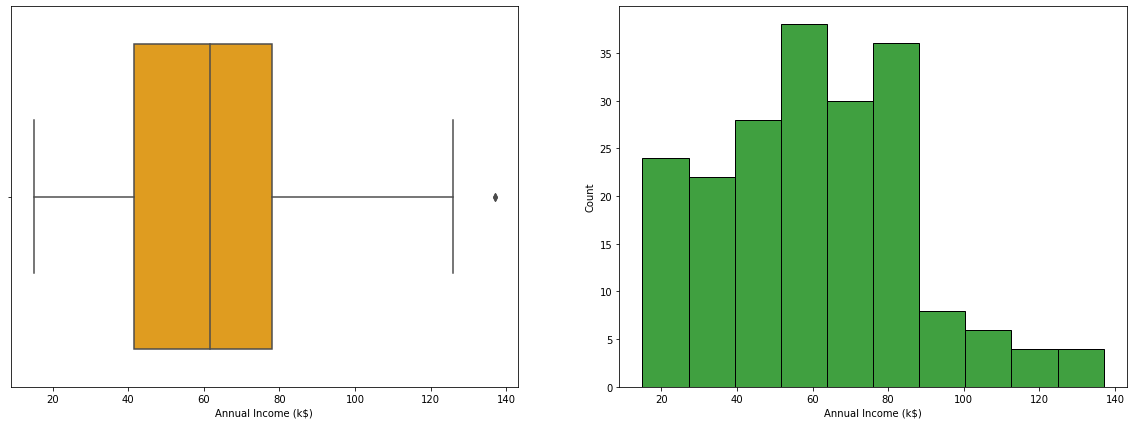

In [37]:
# Distribution of Annual Income (k$)
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = cust_df_c["Annual Income (k$)"], ax =ax[1], color = "g") # ax[1] means image will plot at the second space
sns.boxplot(x = cust_df_c["Annual Income (k$)"], ax = ax[0], color = "orange") # ax[0] means image will plot at the second space
plt.show()

The data is normal distribution as mean and median are almost equal.

In [38]:
info_of_numerical('Spending Score (1-100)')

The mean of the Spending Score (1-100) is 50.2
The median of the Spending Score (1-100) is 50.0
The mode of the Spending Score (1-100) is 42
The standard deviation of the Spending Score (1-100) is 25.823521668370162
Number of missing values in the Spending Score (1-100) is 0


The data uniform distribution as mean and median are equal

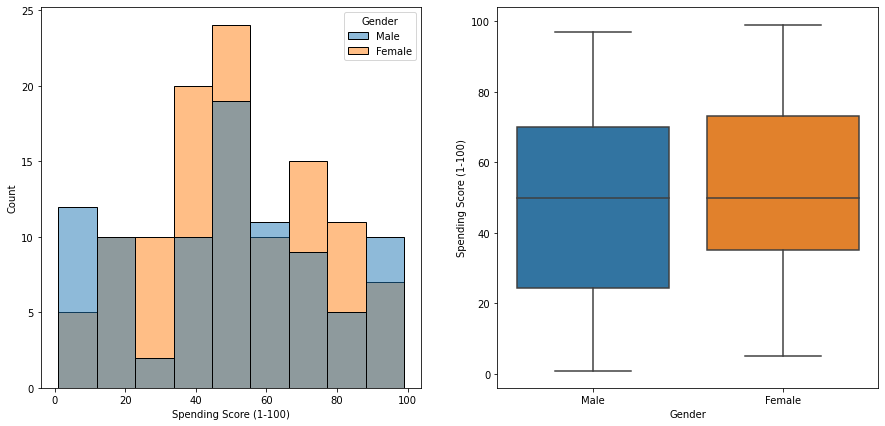

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = cust_df_c["Spending Score (1-100)"], hue = cust_df_c["Gender"], ax = ax[0])
sns.boxplot(y = cust_df_c["Spending Score (1-100)"], x = cust_df_c["Gender"], ax = ax[1])
plt.show()

Spending score of male customers is ranging from 25 to 70 and female spending score is ranging from 35 to 72.

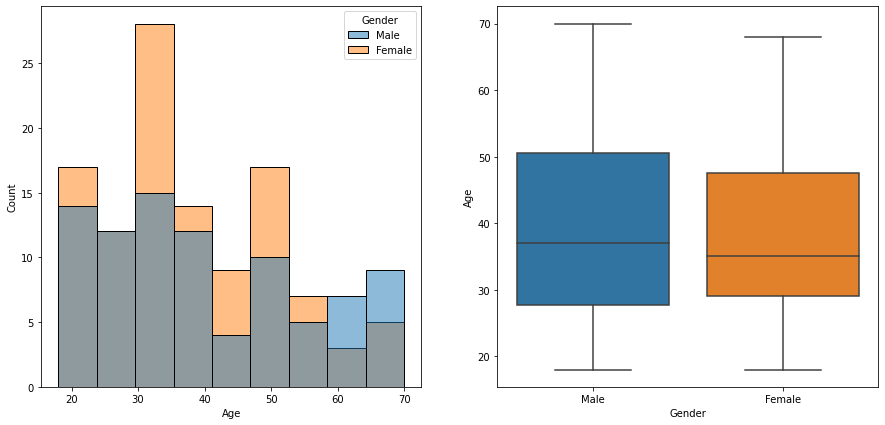

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = cust_df_c["Age"], hue = cust_df_c["Gender"], ax = ax[0])
sns.boxplot(y = cust_df_c["Age"], x = cust_df_c["Gender"], ax = ax[1])
plt.show()

### Feature Engineering

In [146]:
#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Gender'.
cust_df_c["Gender"]= label_encoder.fit_transform(cust_df_c["Gender"])


### Data Standardization

In [147]:
#retrieve only numeric features # we have use StandardScaler for feature scaling

df_num = cust_df_c.select_dtypes('number')
std_sacle = StandardScaler()
df_scale = std_sacle.fit_transform(df_num)

## Model 1 : K Means Clustering Model without PCA

### Finding the good value of K for the model using Elbow Method and silhouette score

#### Elbow Method

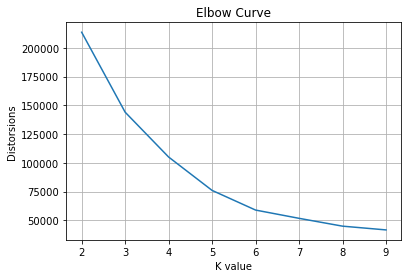

In [148]:
d = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cust_df_c)
    d.append(kmeans.inertia_)
plt.plot(range(2,10),d)
plt.grid(True)
plt.xlabel("K value")
plt.ylabel("Distorsions")
plt.title("Elbow Curve");

>From the Elbow method, the optimal value of K = 6

#### Silhouette score

For n_clusters = 2 The average silhouette_score is : 0.29194123788959897
For n_clusters = 3 The average silhouette_score is : 0.3822283883057429
For n_clusters = 4 The average silhouette_score is : 0.4033163444830927
For n_clusters = 5 The average silhouette_score is : 0.4415820069233983
For n_clusters = 6 The average silhouette_score is : 0.44891910201709817
For n_clusters = 7 The average silhouette_score is : 0.43614425880911284
For n_clusters = 8 The average silhouette_score is : 0.4240464697815711
For n_clusters = 9 The average silhouette_score is : 0.40476237942233534
For n_clusters = 10 The average silhouette_score is : 0.3781239230009488
For n_clusters = 11 The average silhouette_score is : 0.3610187161991284
For n_clusters = 12 The average silhouette_score is : 0.35856205022129134
For n_clusters = 13 The average silhouette_score is : 0.3545543178565923


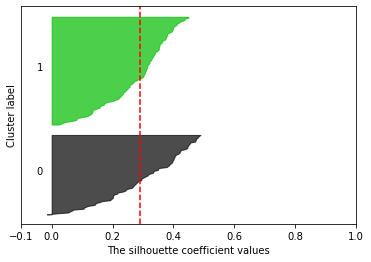

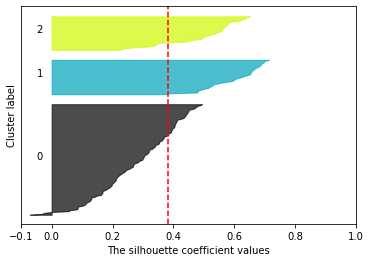

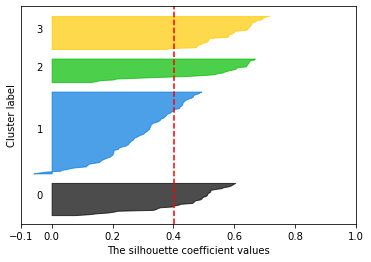

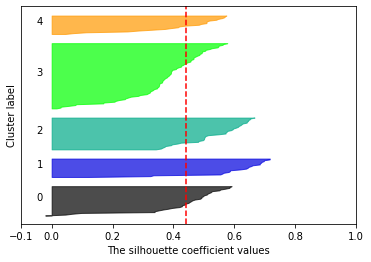

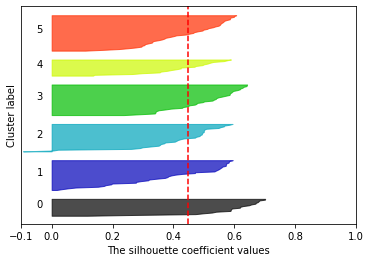

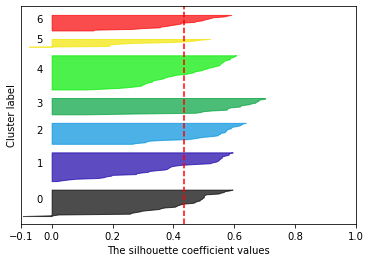

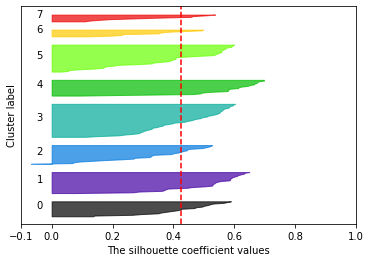

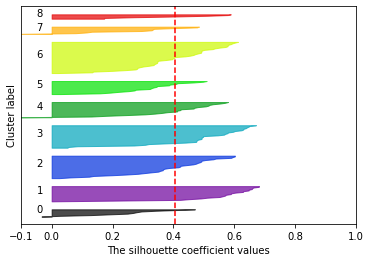

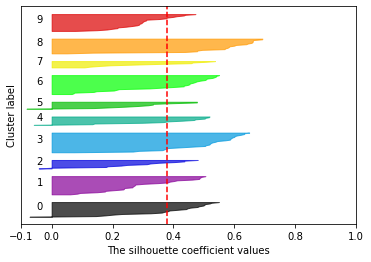

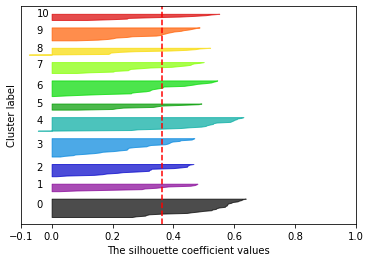

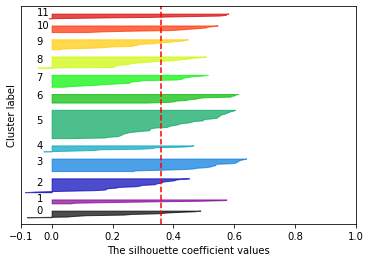

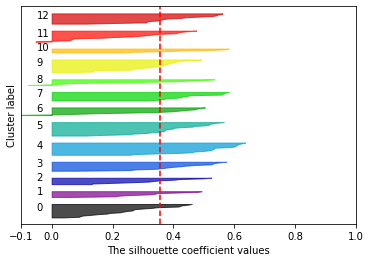

In [149]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(cust_df_c) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(cust_df_c)
    silhouette_avg = silhouette_score(cust_df_c, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(cust_df_c, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
 
 # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

The silhouette give the optimal value of K= 6, For n_clusters = 6 The average silhouette_score is : 0.44891910201709817

Elbow method also  give the optimal value of K = 6

So, K = 6 is the optimum value.


### Building the Model using K = 6

In [150]:
# K Means clustering model: Build the model
Kmeans_model = KMeans(n_clusters=6)
Kmeans_model.fit(df_scale)   #fir the model
cluster = Kmeans_model.labels_

In [279]:
#add new feature to the data
new_cust_df = cust_df

In [280]:
new_cust_df["Cluster_K"]  = cluster

In [281]:
#display total value  count of each clusters
new_cust_df["Cluster_K"].value_counts()

3    50
0    39
1    37
5    27
4    24
2    23
Name: Cluster_K, dtype: int64

>There are total 6 clusters and all these are balanced. 

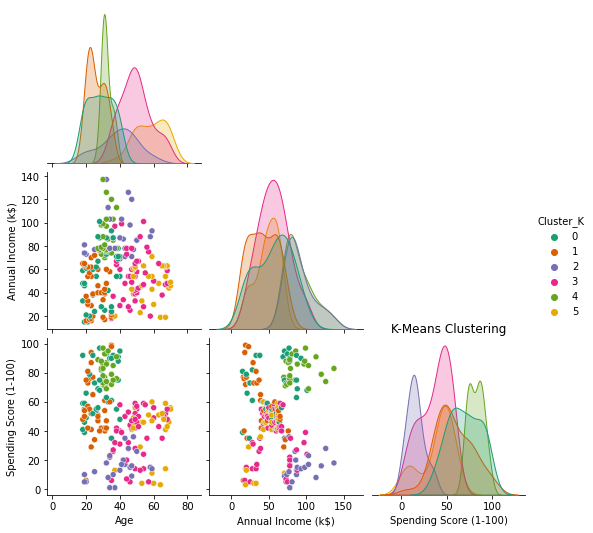

In [282]:
#plot the results
sns.pairplot(new_cust_df, kind = 'scatter', hue='Cluster_K', corner = True, palette ='Dark2')
plt.title("K-Means Clustering")
plt.show()

In [156]:
r = cust_df.groupby(["Gender", "Cluster_K"])["Age"].count()
r

Gender  Cluster_K
Female  1            37
        2             4
        3            50
        4            21
Male    0            39
        2            19
        4             3
        5            27
Name: Age, dtype: int64

> Highest no. of female customers are in cluster 0 and highest no. of male customers are in cluster 1

In [157]:
#Display how the customers are clustered
for i in new_cust_df["Cluster_K"].unique():
    print("*******************All details of cluster", i,"*******************\n")
    D = new_cust_df[["Spending Score (1-100)","Cluster_K"]] [new_cust_df["Cluster_K"]==i]
    B = new_cust_df[["Age","Cluster_K"]] [new_cust_df["Cluster_K"]==i]
    F = new_cust_df[["Gender","Cluster_K"]] [new_cust_df["Cluster_K"]==i]
    I = new_cust_df[["Annual Income (k$)","Cluster_K"]] [new_cust_df["Cluster_K"]==i]
    print("Gender")
    print(F["Gender"].unique(), "\n")
    print("Age range of the customer")
    print(B["Age"].unique(), "\n")
    
    print("Spending Score (1-100) of cutomers")
    print(D["Spending Score (1-100)"].unique(), "\n")
    
    print("Annual Income (k$) of the cutomers")
    print(I["Annual Income (k$)"].unique(), "\n")

*******************All details of cluster 0 *******************

Gender
['Male'] 

Age range of the customer
[19 21 22 20 35 25 31 29 18 24 33 26 40 38 27 39 32 28 34 36] 

Spending Score (1-100) of cutomers
[39 81 79 66 35 73 82 61 92 60 55 59 54 48 41 52 49 46 56 91 95 75 93 97
 90 88 63 69 68] 

Annual Income (k$) of the cutomers
[ 15  20  21  24  25  28  33  38  42  46  48  54  59  60  61  62  64  67
  69  71  73  75  77  78  87  88  93 101] 

*******************All details of cluster 1 *******************

Gender
['Female'] 

Age range of the customer
[20 23 31 22 30 35 24 21 27 29 32 34 19 18 25 28] 

Spending Score (1-100) of cutomers
[ 6 77 40 76 94 72 99 35 98 87 73 81 75 61 65 47 42 54 51 52 57 55 60 50
 41 48 29 34] 

Annual Income (k$) of the cutomers
[16 17 18 19 20 21 23 29 30 33 34 37 39 40 43 46 48 54 57 58 60 62 63 65
 70 72 76] 

*******************All details of cluster 3 *******************

Gender
['Female'] 

Age range of the customer
[35 58 46 54 45 40 49 42 36 6

#### Interpretation

###### The highest spending score of cluster 4 i.e Spending score - 71 to 97. In this cluster , both male and female customers are there

## Model 2: DBSCAN Clustering Algorithm

### Find the the optimum values of Hyperparameters of the DBSCAN algorithm

In [124]:
from sklearn.neighbors import NearestNeighbors

In [158]:
n = NearestNeighbors(n_neighbors=2)
nbrs = n.fit(df_scale)
distances, indices = nbrs.kneighbors(df_scale)

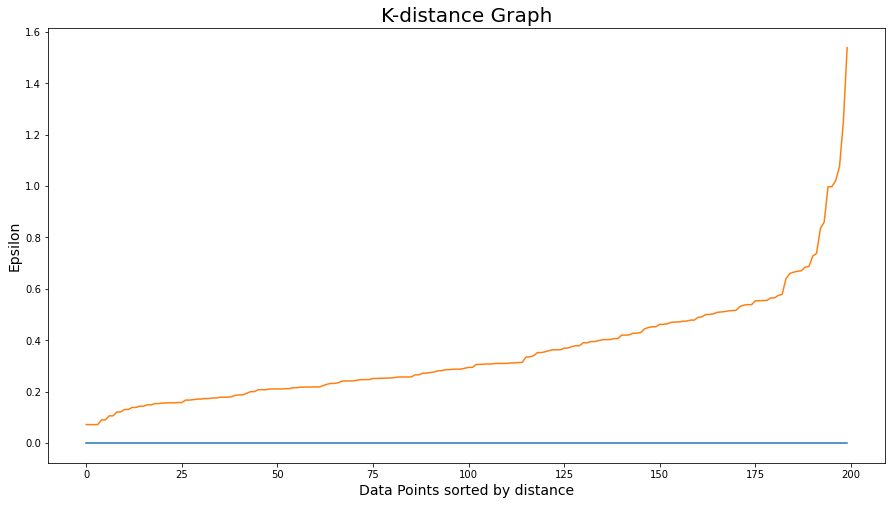

In [159]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:]
plt.figure(figsize=(15,8))
plt.plot(distances)
#plt.axhline(y= 20, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

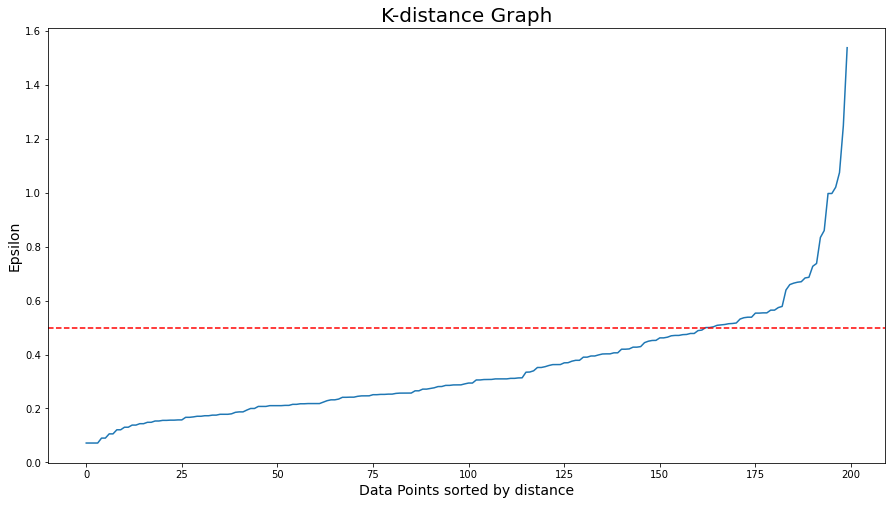

In [232]:
n = NearestNeighbors(n_neighbors=2)
nbrs = n.fit(df_scale)
distances, indices = nbrs.kneighbors(df_scale)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y= 0.5, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

##### From the above graph, epilson value is 0.55

In [233]:
eps = 0.5

for min_samples in [3,4,5,6,7,8,9,10,11,12,13,14]:
    
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    
    cluster_labels = clusterer.fit_predict(df_scale)
    
    x= cluster_labels +2
    y = np.bincount(x)
    j = np.nonzero(y)[0]
    
    results = list(zip(j,y[j]) )
    
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)
    print("\n-----------------------------------------------------------------------------------------------------------------\n")

eps= 0.5 | min_samples=  3 | obtained clustering:  [(1, 52), (2, 9), (3, 6), (4, 3), (5, 3), (6, 19), (7, 20), (8, 20), (9, 3), (10, 5), (11, 7), (12, 3), (13, 8), (14, 19), (15, 3), (16, 4), (17, 6), (18, 3), (19, 4), (20, 3)]

-----------------------------------------------------------------------------------------------------------------

eps= 0.5 | min_samples=  4 | obtained clustering:  [(1, 87), (2, 9), (3, 5), (4, 19), (5, 20), (6, 20), (7, 7), (8, 7), (9, 18), (10, 4), (11, 4)]

-----------------------------------------------------------------------------------------------------------------

eps= 0.5 | min_samples=  5 | obtained clustering:  [(1, 105), (2, 5), (3, 5), (4, 18), (5, 18), (6, 15), (7, 7), (8, 4), (9, 17), (10, 6)]

-----------------------------------------------------------------------------------------------------------------

eps= 0.5 | min_samples=  6 | obtained clustering:  [(1, 135), (2, 18), (3, 18), (4, 6), (5, 6), (6, 17)]

--------------------------------

It give the balanced cluster so epislon value is 0.5 with min_samples= 8

### Build DBSCAN Model

In [270]:
#define model
dbscan = DBSCAN(eps = 0.5, min_samples= 8)
dbscan.fit(df_scale)  #fit the model

DBSCAN(min_samples=8)

In [283]:
#add new feature to the data
new_cust_df["Cluster_DB"]  = dbscan.labels_

In [284]:
#display total value  count of each clusters
new_cust_df["Cluster_DB"].value_counts()

-1    169
 1     17
 0     14
Name: Cluster_DB, dtype: int64

#### Visualising Clusters¶¶

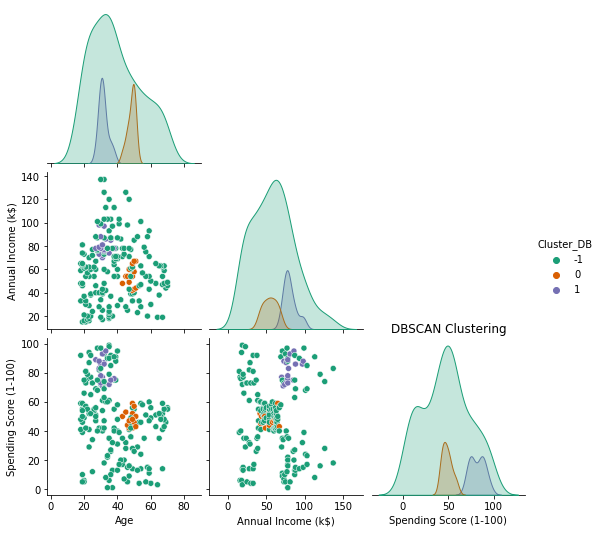

In [286]:
#plot the results
sns.pairplot(new_cust_df.drop(["Cluster_K"], axis = 1), kind = 'scatter', hue='Cluster_DB', corner = True, palette ='Dark2')
plt.title("DBSCAN Clustering")
plt.show()

In [287]:
#Display how the customers are clustered
for i in new_cust_df["Cluster_DB"].unique():
    print("*******************All details of cluster", i,"*******************\n")
    D = new_cust_df[["Spending Score (1-100)","Cluster_DB"]] [new_cust_df["Cluster_DB"]==i]
    B = new_cust_df[["Age","Cluster_DB"]] [new_cust_df["Cluster_DB"]==i]
    F = new_cust_df[["Gender","Cluster_DB"]] [new_cust_df["Cluster_DB"]==i]
    I = new_cust_df[["Annual Income (k$)","Cluster_DB"]] [new_cust_df["Cluster_DB"]==i]
    print("Gender")
    print(F["Gender"].unique(), "\n")
    print("Age range of the customer")
    print(B["Age"].unique(), "\n")
    
    print("Spending Score (1-100) of cutomers")
    print(D["Spending Score (1-100)"].unique(), "\n")
    
    print("Annual Income (k$) of the cutomers")
    print(I["Annual Income (k$)"].unique(), "\n")

*******************All details of cluster -1 *******************

Gender
['Male' 'Female'] 

Age range of the customer
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 69 70 63 68 32 26 57 38 55 34 66 39 43 44 28
 56 41] 

Spending Score (1-100) of cutomers
[39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 60 54 41 46 51 56 52 59 48 49 57 58
 50 43 91 95 11  9 34  7 10 93 12 97 22 90 88 20 16  1 27 63 69 24 68 85
 23  8 74 18 83] 

Annual Income (k$) of the cutomers
[ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137] 

*******************All details of cluster 0 *******************

Gender
['Female'] 

Age range of the customer
[49 50 51 43 47 45 46] 

Spending Score (1-

1. All outliers are in Cluster -1.

2. The highest spending score is cluster 1 and only female customer are there. The age range from 30 to 36

## Model 3: Agglomerative Hierachical Clustering

### Find out the number of clusters with threshold cut.

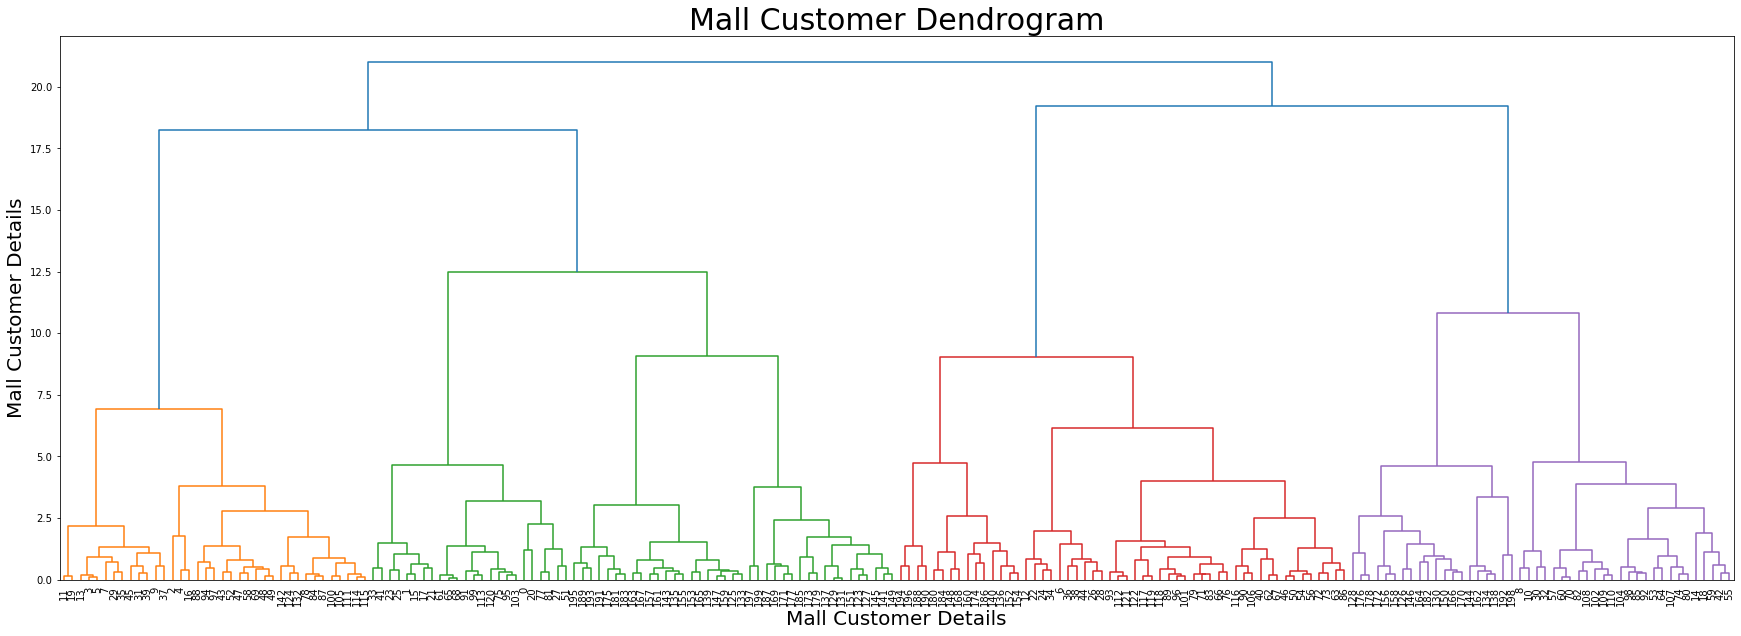

In [241]:
#Plotting Dendogram
import scipy.cluster.hierarchy as sch

#plot
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df_scale, method = 'ward'),labels=cust_df_c.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Mall Customer Dendrogram',fontsize=30)
plt.xlabel('Mall Customer Details',fontsize=20)
plt.ylabel('Mall Customer Details', fontsize=20)
plt.show()

The vertical line with maximum distance is the blue line and hence we can decide a threshold of 12.7 and cut the dendrogram

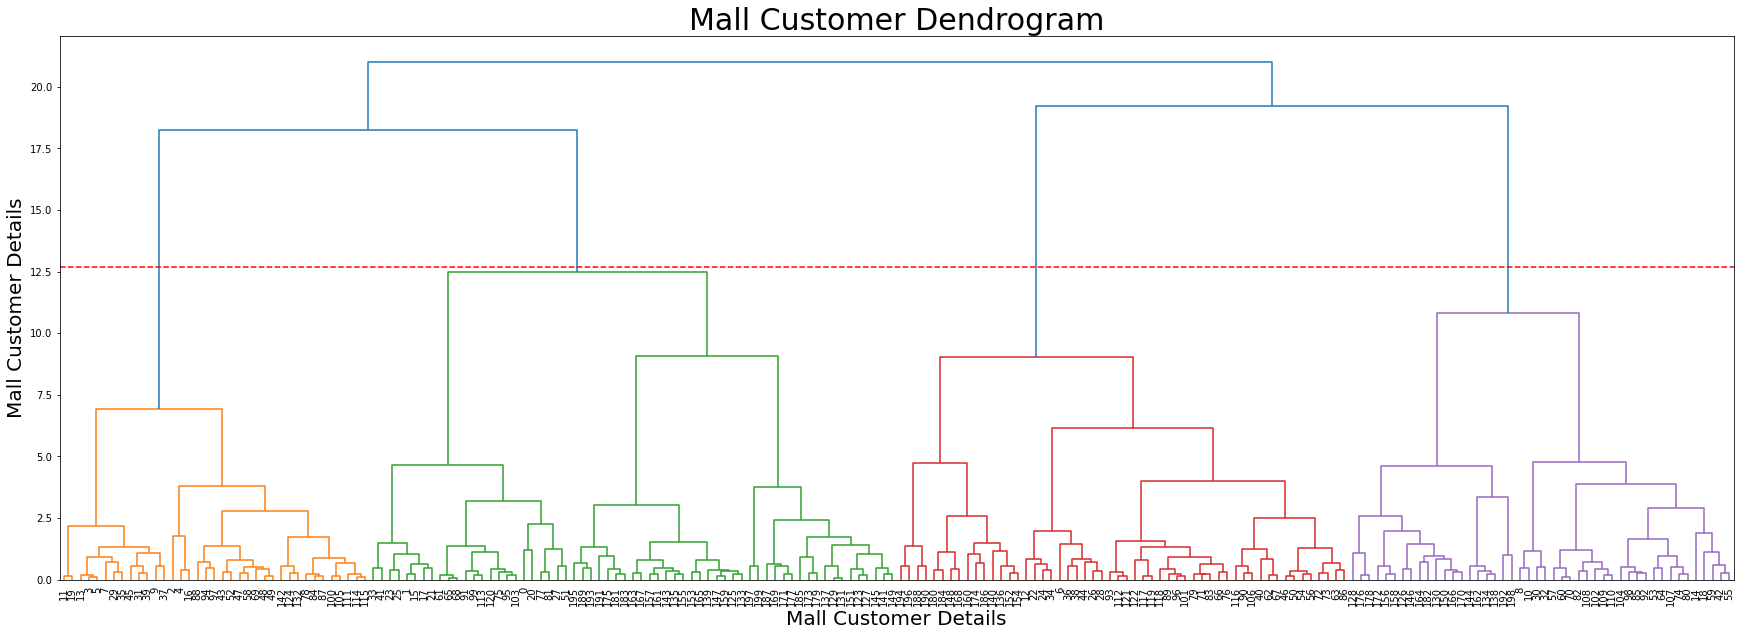

In [266]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df_scale, method = 'ward'),labels = cust_df_c.index)
ax = plt.gca()
plt.axhline(y=12.7, color='r', linestyle='--')
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Mall Customer Dendrogram',fontsize=30)
plt.xlabel('Mall Customer Details',fontsize=20)
plt.ylabel('Mall Customer Details', fontsize=20)
plt.show()

The optimal number of clusters will be 4. So let's fit our Agglomerative model with 4 clusters

In [249]:
#build the model
Agg_model = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
Agg_model.fit_predict(df_scale)

In [288]:
#add new feature to the data
new_cust_df["Cluster_agg"] = Agg_model.labels_

In [289]:
#display total value  count of each clusters
new_cust_df["Cluster_agg"].value_counts()

0    63
2    54
1    46
3    37
Name: Cluster_agg, dtype: int64

#### Visualising Clusters¶

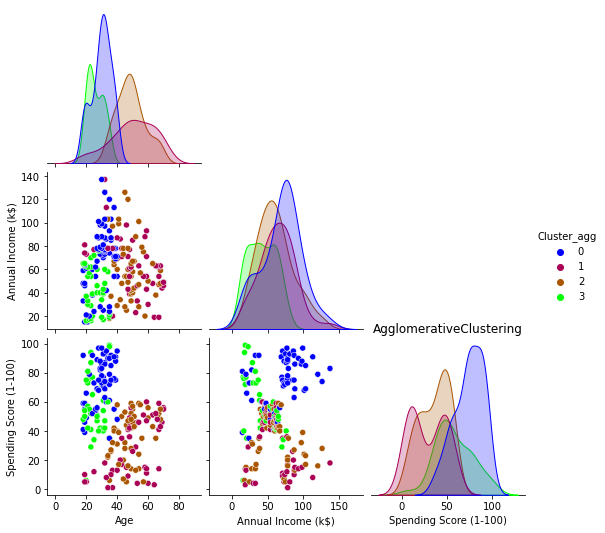

In [290]:


sns.pairplot(new_cust_df.drop(["Cluster_K", "Cluster_DB"],axis=1), kind = "scatter", hue = "Cluster_agg", corner = True, palette = 'brg')
plt.title("AgglomerativeClustering")
plt.show()

In [291]:
#Display how the customers are clustered
for i in new_cust_df["Cluster_agg"].unique():
    print("*******************All details of cluster", i,"*******************\n")
    D = new_cust_df[["Spending Score (1-100)","Cluster_agg"]] [new_cust_df["Cluster_agg"]==i]
    B = new_cust_df[["Age","Cluster_agg"]] [new_cust_df["Cluster_agg"]==i]
    F = new_cust_df[["Gender","Cluster_agg"]] [new_cust_df["Cluster_agg"]==i]
    I = new_cust_df[["Annual Income (k$)","Cluster_agg"]] [new_cust_df["Cluster_agg"]==i]
    print("Gender")
    print(F["Gender"].unique(), "\n")
    print("Age range of the customer")
    print(B["Age"].unique(), "\n")
    
    print("Spending Score (1-100) of cutomers")
    print(D["Spending Score (1-100)"].unique(), "\n")
    
    print("Annual Income (k$) of the cutomers")
    print(I["Annual Income (k$)"].unique(), "\n")

*******************All details of cluster 0 *******************

Gender
['Male' 'Female'] 

Age range of the customer
[19 21 22 20 35 25 31 29 18 24 33 26 40 38 27 39 32 28 34 30 36] 

Spending Score (1-100) of cutomers
[39 81 79 66 35 73 82 61 92 60 55 59 54 48 41 52 49 46 56 91 77 95 75 71
 88 72 93 87 97 74 90 76 89 78 83 63 86 69 68 85] 

Annual Income (k$) of the cutomers
[ 15  20  21  24  25  28  33  38  42  46  48  54  59  60  61  62  64  67
  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88  93  97
  98  99 101 103 113 120 126 137] 

*******************All details of cluster 3 *******************

Gender
['Female'] 

Age range of the customer
[20 23 31 22 30 35 24 21 27 29 32 34 19 18 25 28] 

Spending Score (1-100) of cutomers
[ 6 77 40 76 94 72 99 35 98 87 73 81 75 61 65 47 42 54 51 52 57 55 60 50
 41 48 29 34] 

Annual Income (k$) of the cutomers
[16 17 18 19 20 21 23 29 30 33 34 37 39 40 43 46 48 54 57 58 60 62 63 65
 70 72 76] 

*******************All details

The highest spending score of cluster 0 and both male and female customers are there. The age range from 19 to 36

## Best Model?

##### Interpretation

From the above analysis, we found that, DBSCAN clustering model is good model as it clearly show the outliers and valuable information.